<a href="https://colab.research.google.com/github/namoshi/colab/blob/master/infogeo01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 正規分布の座標間の関係とポテンシャル関数および測地線について
http://ksknw.hatenablog.com/entry/2018/08/14/101535　を参考に作り直したもの

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 座標変換とポテンシャル関数の定義およびグリッドを描くための関数の定義  
$\left( \mu , \sigma^{2} \right) \leftrightarrow \left( \theta^{1} , \theta^{2} \right) \leftrightarrow \left( \eta_{1} , \eta_{2} \right)$：$\displaystyle{\theta^{1} = \frac{\mu}{\sigma^{2}} , \theta^{2} = -\frac{1}{2\sigma^{2}} , \eta_{1} = \mu , \eta_{2} = \mu^{2} + \sigma^{2}}$  
$\displaystyle{\psi \! \left( \theta^{1} , \theta^{2} \right) = -\frac{1}{4} \frac{\left( \theta^{1} \right)^{2}}{\theta^{2}} + \frac{1}{2} \log \left(-\frac{\pi}{\theta^{2}}\right)}$  
$\displaystyle{\varphi \! \left( \eta_{1} , \eta_{2} \right) = -\frac{1}{2} - \frac{1}{2} \log \left( 2\pi \right) - \frac{1}{2} \log \left( \eta_{2} - \left( \eta_{1} \right)^{2} \right)}$

In [9]:
def ms2theta(mu,sigma2):
    theta=np.array([mu/sigma2,-1/(2*sigma2)])
    return theta

def theta2ms(theta):
    mu=-theta[0]/(2*theta[1])
    sigma2=-1/(2*theta[1])
    return mu,sigma2

def eta2ms(eta):
    mu=eta[0]
    sigma2=eta[1]-eta[0]**2
    return mu,sigma2

def ms2eta(mu,sigma2):
    eta=np.array([mu,mu**2+sigma2])
    return eta

def theta2eta(theta):
    eta=np.array([-theta[0]/(2*theta[1]),theta[0]**2/(2*theta[1])**2-1/(2*theta[1])])
    return eta

def eta2theta(eta):
    theta=np.array([eta[0]/(eta[1]-eta[0]**2),-1/2*1/(eta[1]-eta[0]**2)])
    return theta

def psi(theta):
    return -1/4*theta[0]**2/theta[1]+1/2*np.log(-np.pi/theta[1])

def phi(eta):
    return -1/2-1/2*np.log(2*np.pi)-1/2*np.log(eta[1]-eta[0]**2)

def plotGrid(x,y,color,alpha):
    for i,j in zip(x,y):
        plt.plot(i,j,color=color,alpha=alpha)
    for i,j in zip(x.transpose(),y.transpose()):
        plt.plot(i,j,color=color,alpha=alpha)

## ポテンシャル関数の凸性

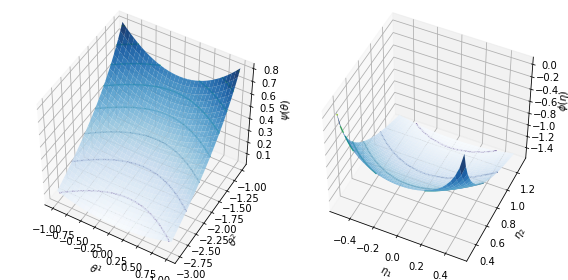

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(8,4))

grid_theta=np.array([np.linspace(-1,1,31),np.linspace(-3,-1,31)])
meshgrid_theta=np.meshgrid(grid_theta[0],grid_theta[1])
psi_theta=psi(meshgrid_theta)

ax1=fig.add_subplot(1,2,1, projection='3d')
ax1.plot_surface(meshgrid_theta[0],meshgrid_theta[1],psi_theta,cmap='Blues',alpha=0.9)
ax1.view_init(elev=48, azim=-60)
ax1.contour(meshgrid_theta[0],meshgrid_theta[1],psi_theta)
ax1.set_xlabel(r'$\theta^{1}$')
ax1.set_ylabel(r'$\theta^{2}$')
ax1.set_zlabel(r'$\psi \left( \theta \right)$')

grid_eta=np.array([np.linspace(-0.5,0.5,31),np.linspace(0.3,1.3,31)])
meshgrid_eta=np.meshgrid(grid_eta[0],grid_eta[1])
phi_eta=phi(meshgrid_eta)

ax2=fig.add_subplot(1,2,2, projection='3d')
ax2.plot_surface(meshgrid_eta[0],meshgrid_eta[1],phi_eta,cmap='Blues',alpha=0.9)
ax2.view_init(elev=48, azim=-65)
ax2.contour(meshgrid_eta[0],meshgrid_eta[1],phi_eta)
ax2.set_xlabel(r'$\eta_{1}$')
ax2.set_ylabel(r'$\eta_{2}$')
ax2.set_zlabel(r'$\phi \left( \eta \right)$')

plt.tight_layout()
plt.show()

## 座標変換とポテンシャル関数の等高線

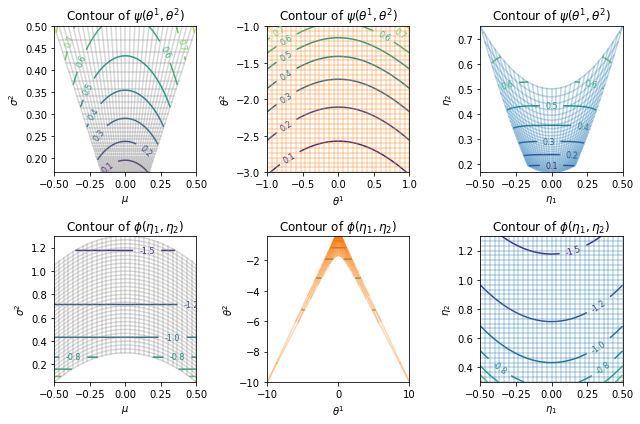

In [11]:
plt.figure(figsize=(9,6))
labels=np.array([[r'$\mu$',r'$\sigma^2$'],[r'$\theta^{1}$',r'$\theta^{2}$'],[r'$\eta_{1}$',r'$\eta_{2}$']])
colors=np.array(['C7','C1','C0'])

grid_theta=np.array([np.linspace(-1,1,31),np.linspace(-3,-1,31)])
meshgrid_theta=np.meshgrid(grid_theta[0],grid_theta[1])
psi_theta=psi(meshgrid_theta)
meshgrid_ms=theta2ms(meshgrid_theta)
meshgrid_eta=theta2eta(meshgrid_theta)
meshgrids=np.array([meshgrid_ms,meshgrid_theta,meshgrid_eta])

for i in np.arange(3):
    plt.subplot(2,3,i+1)
    plotGrid(meshgrids[i][0],meshgrids[i][1],colors[i],0.3)
    con=plt.contour(meshgrids[i][0],meshgrids[i][1],psi_theta)
    con.clabel(fmt='%1.1f',fontsize=8)
    plt.xlabel(labels[i%3][0])
    plt.ylabel(labels[i%3][1])
    plt.title(r'Contour of $\psi \left( \theta^{1} , \theta^{2} \right)$')
#-------------------------------
grid_eta=np.array([np.linspace(-0.5,0.5,31),np.linspace(0.3,1.3,31)])
meshgrid_eta=np.meshgrid(grid_eta[0],grid_eta[1])
phi_eta=phi(meshgrid_eta)
meshgrid_ms=eta2ms(meshgrid_eta)
meshgrid_theta=eta2theta(meshgrid_eta)
meshgrids=np.array([meshgrid_ms,meshgrid_theta,meshgrid_eta])

for i in np.arange(3):
    plt.subplot(2,3,i+4)
    plotGrid(meshgrids[i][0],meshgrids[i][1],colors[i],0.3)
    con=plt.contour(meshgrids[i][0],meshgrids[i][1],phi_eta)
    con.clabel(fmt='%1.1f',fontsize=8)
    plt.xlabel(labels[i%3][0])
    plt.ylabel(labels[i%3][1])
    plt.title(r'Contour of $\phi \left( \eta_{1} , \eta_{2} \right)$')

plt.tight_layout()
plt.show()

## 各座標系で見た測地線（e-平坦であることとm-平坦であることを利用している）

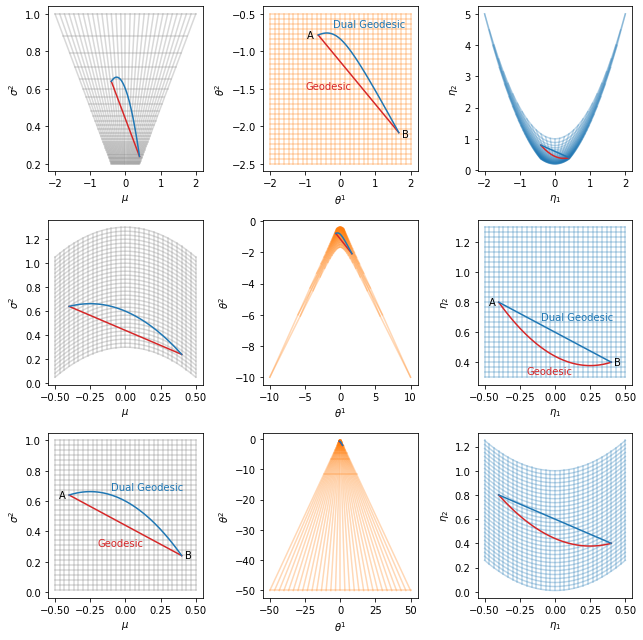

In [12]:
theta_A=np.array([-5/8,-25/32])
theta_B=np.array([5/3,-75/36])

eta_A=np.array([-0.4,0.8])
eta_B=np.array([0.4,0.4])

range_t=np.arange(0,1+0.01,0.01)
segment_theta1=np.transpose([theta_B*t+theta_A*(1-t) for t in range_t])
segment_ms1=theta2ms(segment_theta1)
segment_eta1=theta2eta(segment_theta1)
segment_eta2=np.transpose([eta_B*t+eta_A*(1-t) for t in range_t])
segment_theta2=eta2theta(segment_eta2)
segment_ms2=eta2ms(segment_eta2)
segments=np.array([[segment_ms1,segment_ms2],[segment_theta1,segment_theta2],[segment_eta1,segment_eta2]])
#---------------------------
plt.figure(figsize=(9,9))
labels=np.array([[r'$\mu$',r'$\sigma^2$'],[r'$\theta^{1}$',r'$\theta^{2}$'],[r'$\eta_{1}$',r'$\eta_{2}$']])
colors=np.array(['C7','C1','C0'])

grid_theta=np.array([np.linspace(-2,2,31),np.linspace(-2.5,-0.5,31)])
meshgrid_theta=np.meshgrid(grid_theta[0],grid_theta[1])
meshgrid_ms=theta2ms(meshgrid_theta)
meshgrid_eta=theta2eta(meshgrid_theta)
meshgrids=np.array([meshgrid_ms,meshgrid_theta,meshgrid_eta])

for i in np.arange(3):
    plt.subplot(3,3,i+1)
    plotGrid(meshgrids[i][0],meshgrids[i][1],colors[i],0.3)
    plt.plot(segments[i][0][0],segments[i][0][1],'C3')
    plt.plot(segments[i][1][0],segments[i][1][1],'C0')
    plt.xlabel(labels[i][0])
    plt.ylabel(labels[i][1])
    if i==1:
        plt.text(-0.95,-0.82,'A',size=10)
        plt.text(1.75,-2.15,'B',size=10)
        plt.text(-1,-1.5,'Geodesic',size=10,color='C3')
        plt.text(-0.2,-0.68,'Dual Geodesic',size=10,color='C0')
#----------------------------
grid_eta=np.array([np.linspace(-0.5,0.5,31),np.linspace(0.3,1.3,31)])
meshgrid_eta=np.meshgrid(grid_eta[0],grid_eta[1])
meshgrid_theta=eta2theta(meshgrid_eta)
meshgrid_ms=eta2ms(meshgrid_eta)
meshgrids=np.array([meshgrid_ms,meshgrid_theta,meshgrid_eta])

for i in np.arange(3):
    plt.subplot(3,3,i+4)
    plotGrid(meshgrids[i][0],meshgrids[i][1],colors[i],0.3)
    plt.plot(segments[i][0][0],segments[i][0][1],'C3')
    plt.plot(segments[i][1][0],segments[i][1][1],'C0')
    plt.xlabel(labels[i][0])
    plt.ylabel(labels[i][1])
    if i==2:
        plt.text(-0.47,0.78,'A',size=10)
        plt.text(0.42,0.38,'B',size=10)
        plt.text(-0.2,0.32,'Geodesic',size=10,color='C3')
        plt.text(-0.1,0.68,'Dual Geodesic',size=10,color='C0')
#-----------------------------
grid_ms=np.array([np.linspace(-0.5,0.5,31),np.linspace(0.01,1.0,31)])
meshgrid_ms=np.meshgrid(grid_ms[0],grid_ms[1])
meshgrid_theta=ms2theta(meshgrid_ms[0],meshgrid_ms[1])
meshgrid_eta=ms2eta(meshgrid_ms[0],meshgrid_ms[1])
meshgrids=np.array([meshgrid_ms,meshgrid_theta,meshgrid_eta])

for i in np.arange(3):
    plt.subplot(3,3,i+7)
    plotGrid(meshgrids[i][0],meshgrids[i][1],colors[i],0.3)
    plt.plot(segments[i][0][0],segments[i][0][1],'C3')
    plt.plot(segments[i][1][0],segments[i][1][1],'C0')
    plt.xlabel(labels[i][0])
    plt.ylabel(labels[i][1])
    if i==0:
        plt.text(-0.47,0.62,'A',size=10)
        plt.text(0.42,0.22,'B',size=10)
        plt.text(-0.2,0.3,'Geodesic',size=10,color='C3')
        plt.text(-0.1,0.67,'Dual Geodesic',size=10,color='C0')

plt.tight_layout()
plt.show()